In [1]:
from hotel_aspect.dev_hotel_aspect import HotelAspect
# title = "Oke"
# content = """Staff cukup ramah. Kamar bersih. Nyaman enak."""

title = "Rooftop on 30 is so bad"
# content = """Baru kali ini saya berkunjung ke hotel yg mempunyai rooftop di
# lantai 30 dimana kita bs melihat kota Semarang.
# Di iringi angin semilir bahkan saya sempat makan di rooftop sungguh semakin
# syahdu. Saya Recomend utk para pembaca supaya bs mencoba berkunjung ke hotel
# ini. Sungguh menyenangkan."""
content = """This room is too bad. I think the staff is rude too"""

clf = HotelAspect()
clf.load_models()
result = clf.predict(title, content)
print(title+"\n"+content)
print(result)

Rooftop on 30 is so bad
This room is too bad. I think the staff is rude too
{'surrounding': 'negative', 'service': 'negative', 'meal': 'neutral', 'location': 'neutral', 'staff': 'negative', 'room': 'neutral', 'facility': 'negative', 'quality': 'neutral', 'value': 'neutral'}


value aspect
Accuracy
 89.6358543417367 %

classification_report
               precision    recall  f1-score   support

    negative       0.58      0.41      0.48        17
     neutral       0.91      0.98      0.95       307
    positive       0.79      0.33      0.47        33

    accuracy                           0.90       357
   macro avg       0.76      0.58      0.63       357
weighted avg       0.89      0.90      0.88       357



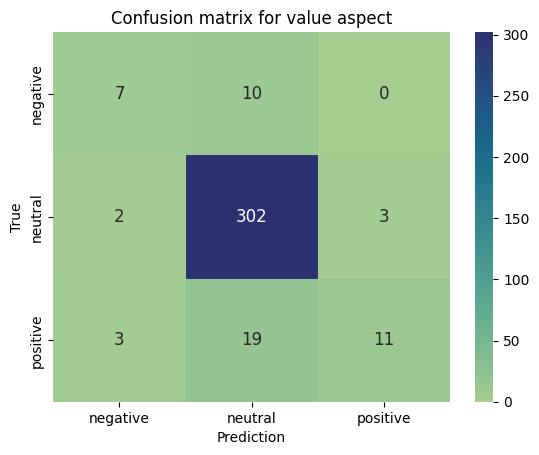

location aspect
Accuracy
 82.6330532212885 %

classification_report
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00         7
     neutral       0.85      0.93      0.89       249
    positive       0.77      0.62      0.69       101

    accuracy                           0.83       357
   macro avg       0.54      0.52      0.53       357
weighted avg       0.81      0.83      0.82       357



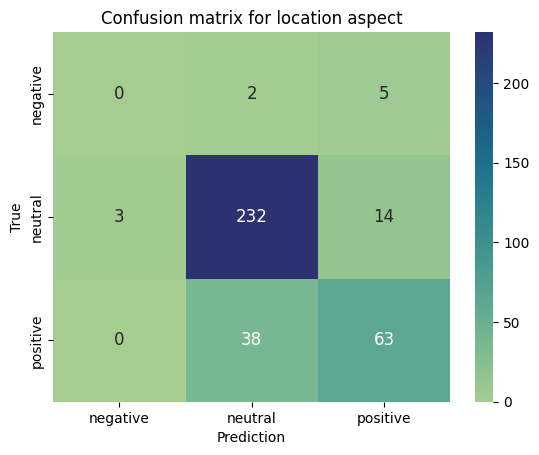

service aspect
Accuracy
 70.30812324929971 %

classification_report
               precision    recall  f1-score   support

    negative       0.61      0.76      0.68        51
     neutral       0.73      0.75      0.74       192
    positive       0.71      0.60      0.65       114

    accuracy                           0.70       357
   macro avg       0.68      0.70      0.69       357
weighted avg       0.71      0.70      0.70       357



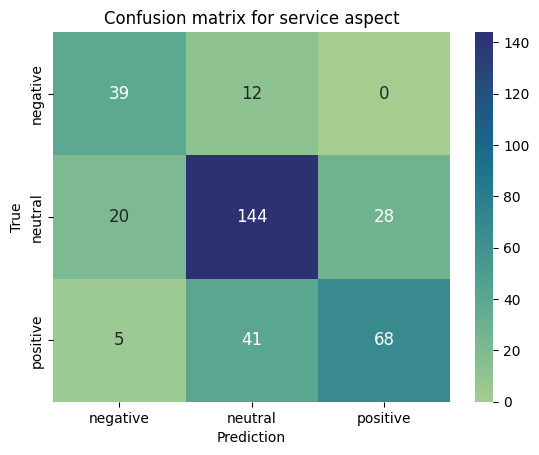

meal aspect
Accuracy
 75.63025210084034 %

classification_report
               precision    recall  f1-score   support

    negative       0.50      0.55      0.53        38
     neutral       0.80      0.82      0.81       200
    positive       0.77      0.71      0.74       119

    accuracy                           0.76       357
   macro avg       0.69      0.70      0.69       357
weighted avg       0.76      0.76      0.76       357



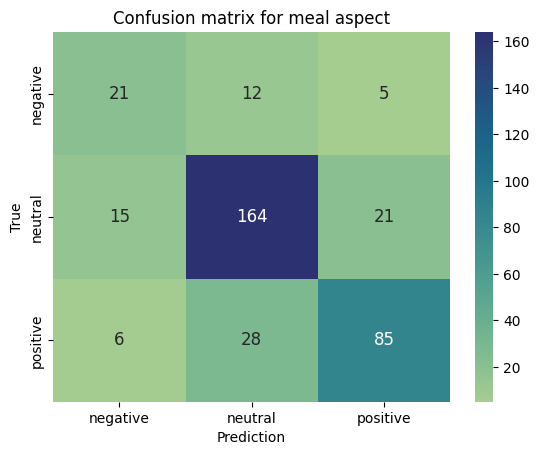

facility aspect
Accuracy
 70.02801120448179 %

classification_report
               precision    recall  f1-score   support

    negative       0.49      0.58      0.53        60
     neutral       0.77      0.81      0.79       210
    positive       0.70      0.52      0.60        87

    accuracy                           0.70       357
   macro avg       0.65      0.64      0.64       357
weighted avg       0.70      0.70      0.70       357



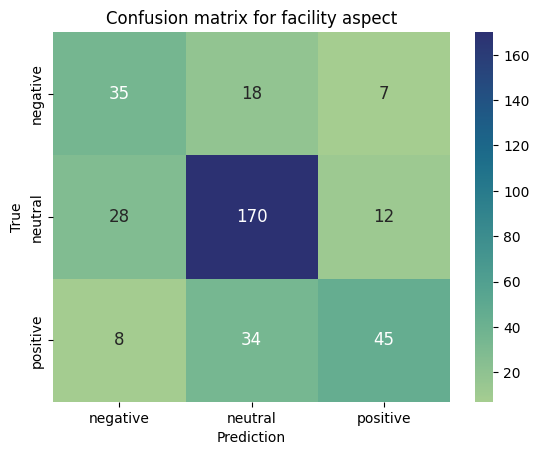

room aspect
Accuracy
 70.02801120448179 %

classification_report
               precision    recall  f1-score   support

    negative       0.66      0.85      0.74        78
     neutral       0.73      0.72      0.73       171
    positive       0.69      0.56      0.62       108

    accuracy                           0.70       357
   macro avg       0.69      0.71      0.70       357
weighted avg       0.70      0.70      0.70       357



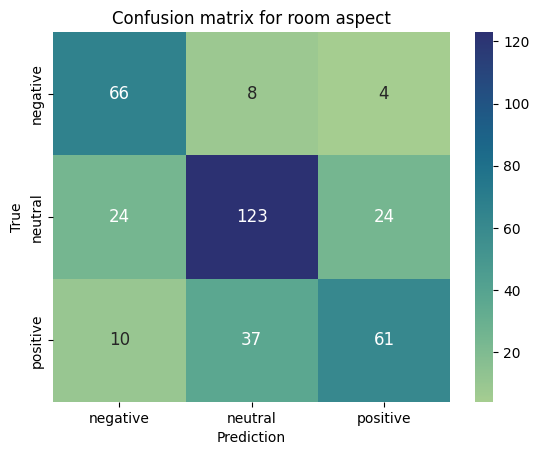

quality aspect
Accuracy
 63.86554621848739 %

classification_report
               precision    recall  f1-score   support

    negative       0.47      0.42      0.44        48
     neutral       0.65      0.80      0.72       203
    positive       0.71      0.43      0.54       106

    accuracy                           0.64       357
   macro avg       0.61      0.55      0.56       357
weighted avg       0.64      0.64      0.63       357



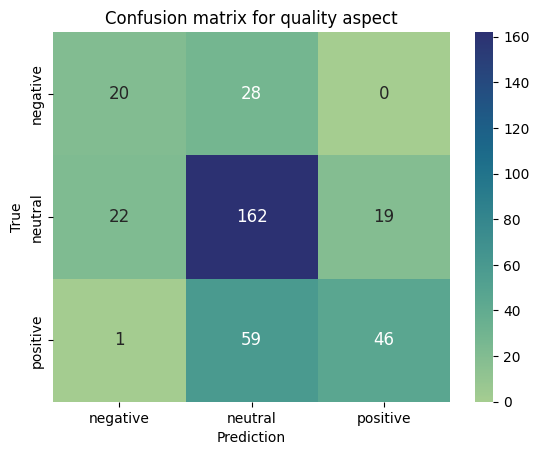

staff aspect
Accuracy
 78.15126050420169 %

classification_report
               precision    recall  f1-score   support

    negative       0.61      0.49      0.54        35
     neutral       0.79      0.85      0.82       192
    positive       0.81      0.76      0.79       130

    accuracy                           0.78       357
   macro avg       0.74      0.70      0.71       357
weighted avg       0.78      0.78      0.78       357



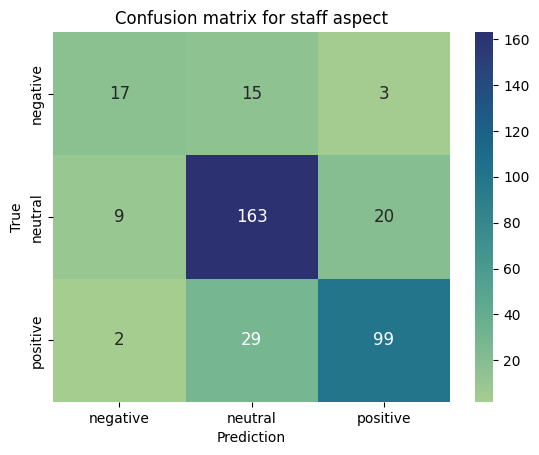

surrounding aspect
Accuracy
 84.87394957983193 %

classification_report
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00         5
     neutral       0.88      0.95      0.91       295
    positive       0.63      0.39      0.48        57

    accuracy                           0.85       357
   macro avg       0.50      0.45      0.46       357
weighted avg       0.82      0.85      0.83       357



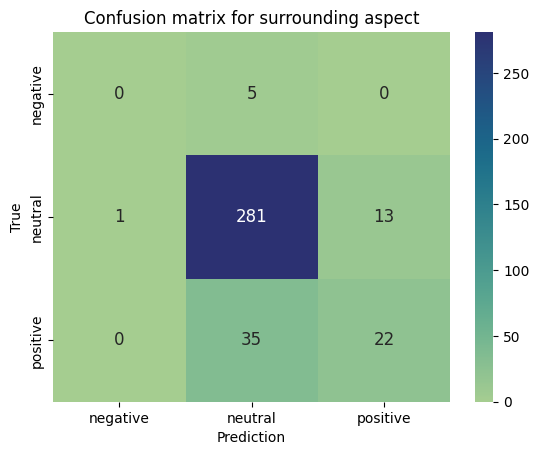

Saving model value
Saving model location
Saving model service
Saving model meal
Saving model facility
Saving model room
Saving model quality
Saving model staff
Saving model surrounding
Save model Finished


In [6]:
#Model Bahasa Indonesia
import pandas as pd 
import re, joblib, os

PATH = 'data/data.csv'

# Load the dataset
df = pd.read_csv(PATH, sep=";")

# Drop rows with missing values
df.dropna(inplace=True)

# Map sentiment labels to unified categories
df.iloc[:, 3:12] = df.iloc[:, 3:12].replace(['pos'], 'positive')
df.iloc[:, 3:12] = df.iloc[:, 3:12].replace(['neu'], 'neutral')
df.iloc[:, 3:12] = df.iloc[:, 3:12].replace(['neg'], 'negative')
df.iloc[:, 3:12] = df.iloc[:, 3:12].replace(['0'], 'neutral')
df.iloc[:, 3:12] = df.iloc[:, 3:12].replace([0], 'neutral')
df.iloc[:, 3:12] = df.iloc[:, 3:12].replace(['[ps', 'post', '\npos'], 'positive')
df.iloc[:, 3:12] = df.iloc[:, 3:12].replace(['ops', '0pos'], 'positive')

df = df.rename(columns={'value_sentiment':'value', 'location_sentiment' : 'location','service_sentiment':'service',
                   'meal_sentiment':'meal','facility_sentiment':'facility','room_sentiment':'room',
                   'quality_sentiment':'quality','staff_sentiment':'staff','surrounding_sentiment':'surrounding'})

sentiments = df.iloc[:, 3:12]
texts = df['judul_review'] + ' ' + df['isi_review']
clf = HotelAspect()
clf.create_models(texts, sentiments,save_path='models_indonesia')

surrounding aspect
Accuracy
 65.0 %

classification_report
               precision    recall  f1-score   support

    negative       0.46      0.48      0.47       133
     neutral       0.47      0.46      0.46       415
    positive       0.75      0.76      0.75       972

    accuracy                           0.65      1520
   macro avg       0.56      0.56      0.56      1520
weighted avg       0.65      0.65      0.65      1520



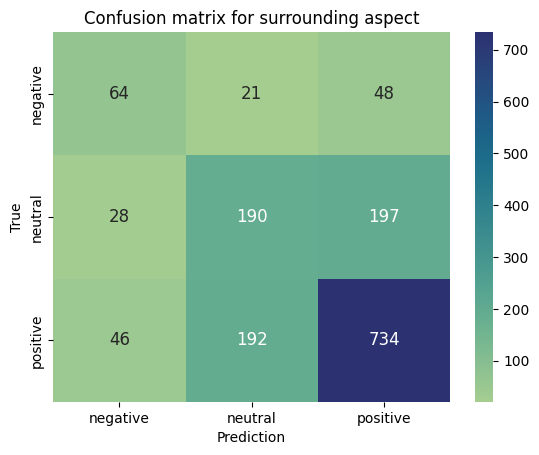

service aspect
Accuracy
 75.0657894736842 %

classification_report
               precision    recall  f1-score   support

    negative       0.43      0.45      0.44        93
     neutral       0.72      0.75      0.73       579
    positive       0.82      0.78      0.80       848

    accuracy                           0.75      1520
   macro avg       0.65      0.66      0.66      1520
weighted avg       0.75      0.75      0.75      1520



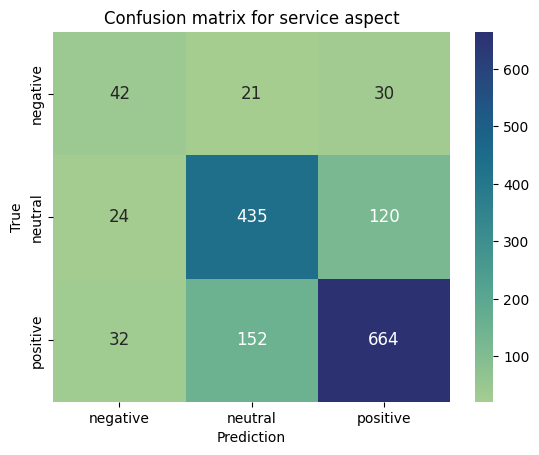

meal aspect
Accuracy
 78.8157894736842 %

classification_report
               precision    recall  f1-score   support

    negative       0.29      0.24      0.26        70
     neutral       0.83      0.84      0.83       794
    positive       0.79      0.78      0.78       656

    accuracy                           0.79      1520
   macro avg       0.63      0.62      0.63      1520
weighted avg       0.78      0.79      0.79      1520



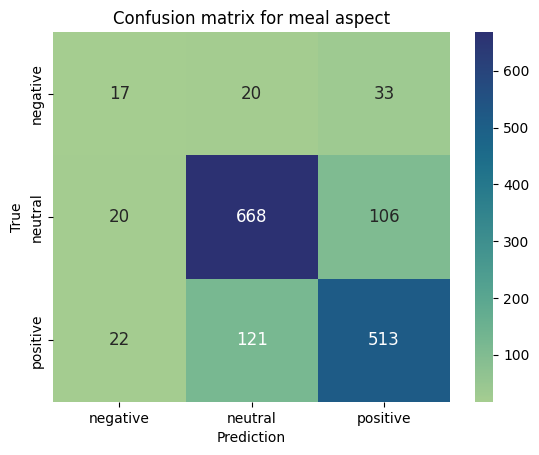

location aspect
Accuracy
 84.47368421052632 %

classification_report
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00        23
     neutral       0.85      0.91      0.88       878
    positive       0.84      0.78      0.81       619

    accuracy                           0.84      1520
   macro avg       0.57      0.56      0.56      1520
weighted avg       0.84      0.84      0.84      1520



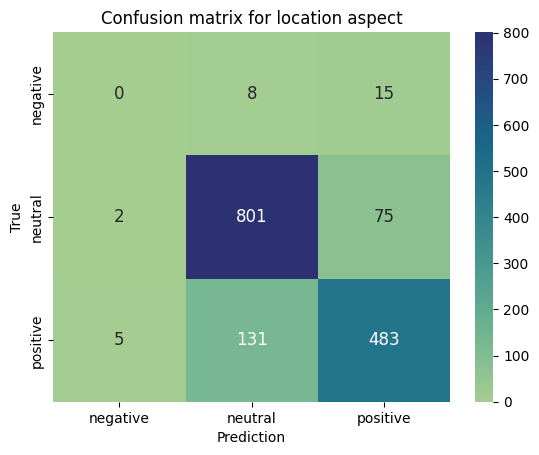

staff aspect
Accuracy
 86.90789473684211 %

classification_report
               precision    recall  f1-score   support

    negative       0.59      0.38      0.46        61
     neutral       0.85      0.90      0.88       636
    positive       0.90      0.88      0.89       823

    accuracy                           0.87      1520
   macro avg       0.78      0.72      0.74      1520
weighted avg       0.87      0.87      0.87      1520



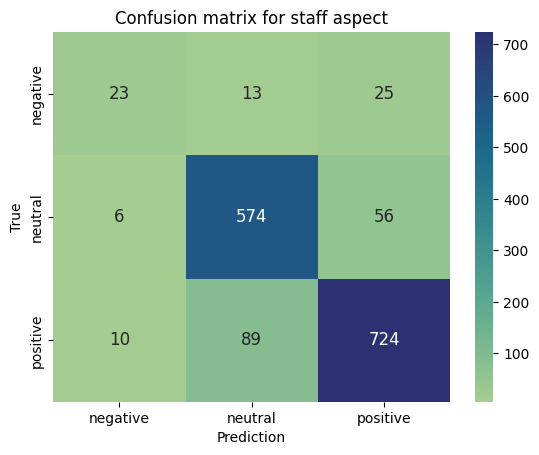

room aspect
Accuracy
 76.18421052631578 %

classification_report
               precision    recall  f1-score   support

    negative       0.43      0.43      0.43        92
     neutral       0.80      0.80      0.80       762
    positive       0.76      0.76      0.76       666

    accuracy                           0.76      1520
   macro avg       0.66      0.67      0.66      1520
weighted avg       0.76      0.76      0.76      1520



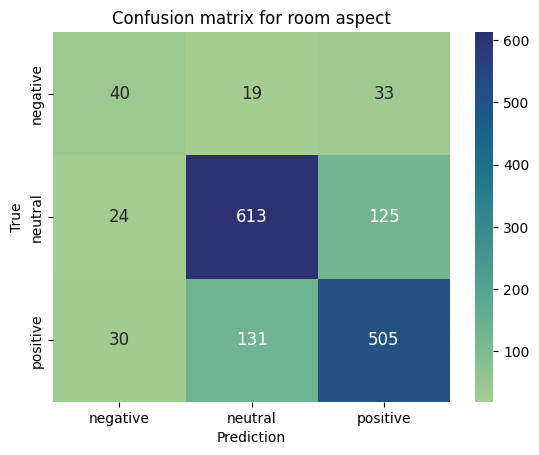

facility aspect
Accuracy
 73.75 %

classification_report
               precision    recall  f1-score   support

    negative       0.51      0.61      0.56       171
     neutral       0.79      0.87      0.82       935
    positive       0.72      0.50      0.59       414

    accuracy                           0.74      1520
   macro avg       0.67      0.66      0.66      1520
weighted avg       0.74      0.74      0.73      1520



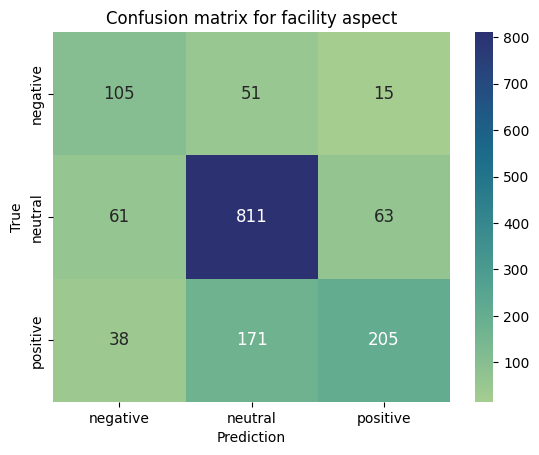

quality aspect
Accuracy
 82.56578947368422 %

classification_report
               precision    recall  f1-score   support

    negative       0.29      0.14      0.19        35
     neutral       0.84      0.98      0.90      1258
    positive       0.59      0.06      0.10       227

    accuracy                           0.83      1520
   macro avg       0.57      0.39      0.40      1520
weighted avg       0.79      0.83      0.77      1520



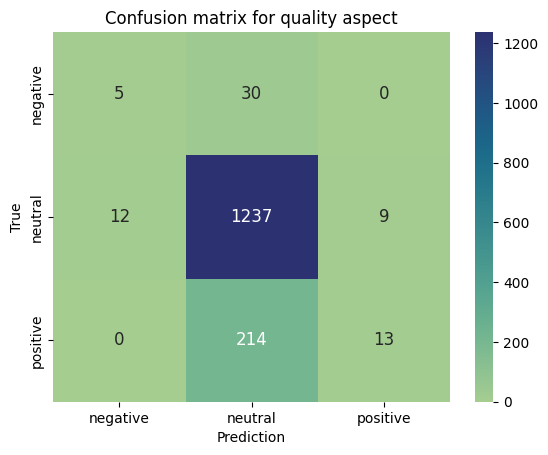

value aspect
Accuracy
 82.56578947368422 %

classification_report
               precision    recall  f1-score   support

    negative       0.38      0.29      0.32        42
     neutral       0.85      0.95      0.90      1180
    positive       0.70      0.42      0.52       298

    accuracy                           0.83      1520
   macro avg       0.64      0.55      0.58      1520
weighted avg       0.81      0.83      0.81      1520



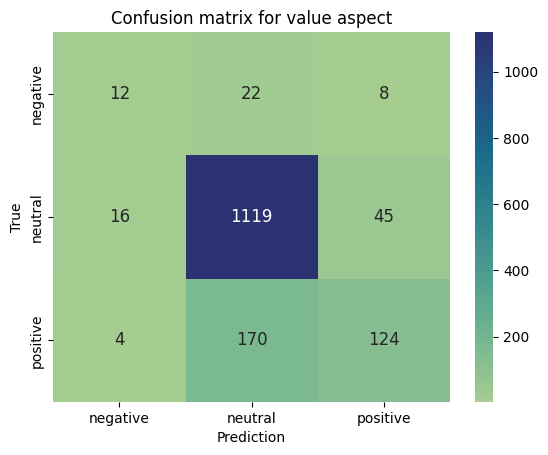

Saving model surrounding
Saving model service
Saving model meal
Saving model location
Saving model staff
Saving model room
Saving model facility
Saving model quality
Saving model value
Save model Finished
CPU times: total: 34.8 s
Wall time: 31min 52s


In [17]:
%%time
# Model Bahasa Inggris
df = pd.read_csv("notebooks/data/data_english.csv")

df.dropna(inplace=True)
texts = df['review.message']
sentiments = df.iloc[:, 4:13]

clf.create_models(texts,sentiments)

surrounding
Accuracy
 65.0 %

classification_report
               precision    recall  f1-score   support

    Negative       0.46      0.48      0.47       133
     Neutral       0.47      0.46      0.46       415
    Positive       0.75      0.76      0.75       972

    accuracy                           0.65      1520
   macro avg       0.56      0.56      0.56      1520
weighted avg       0.65      0.65      0.65      1520



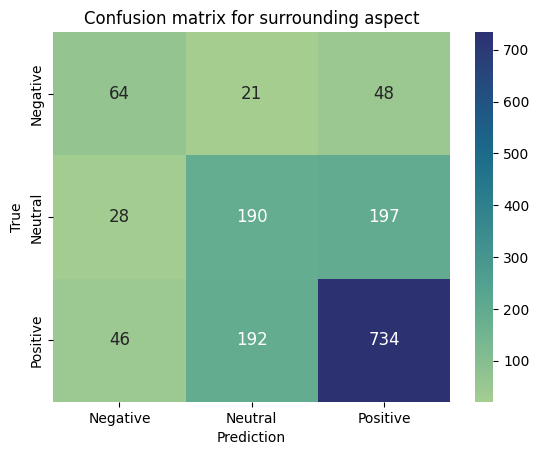

service
Accuracy
 75.0657894736842 %

classification_report
               precision    recall  f1-score   support

    Negative       0.43      0.45      0.44        93
     Neutral       0.72      0.75      0.73       579
    Positive       0.82      0.78      0.80       848

    accuracy                           0.75      1520
   macro avg       0.65      0.66      0.66      1520
weighted avg       0.75      0.75      0.75      1520



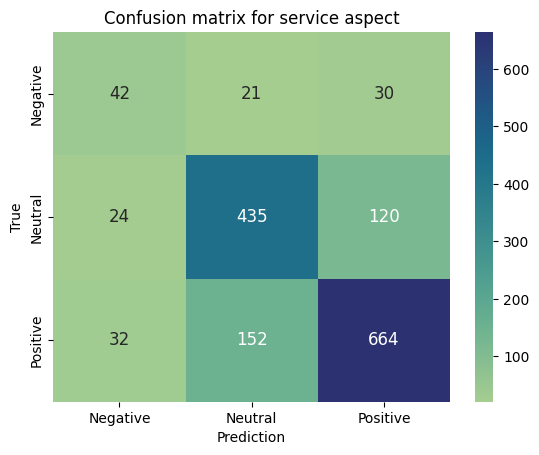

meal
Accuracy
 78.8157894736842 %

classification_report
               precision    recall  f1-score   support

    Negative       0.29      0.24      0.26        70
     Neutral       0.83      0.84      0.83       794
    Positive       0.79      0.78      0.78       656

    accuracy                           0.79      1520
   macro avg       0.63      0.62      0.63      1520
weighted avg       0.78      0.79      0.79      1520



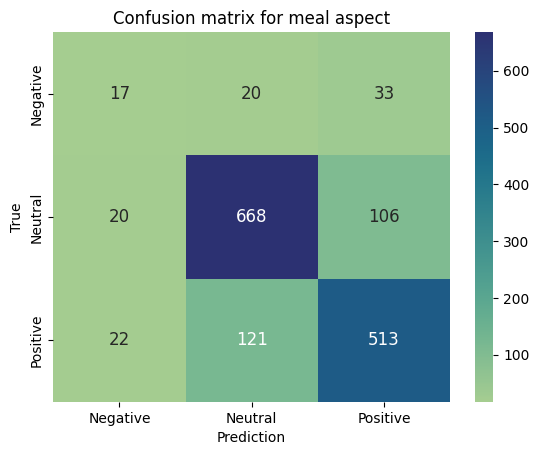

location
Accuracy
 84.47368421052632 %

classification_report
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        23
     Neutral       0.85      0.91      0.88       878
    Positive       0.84      0.78      0.81       619

    accuracy                           0.84      1520
   macro avg       0.57      0.56      0.56      1520
weighted avg       0.84      0.84      0.84      1520



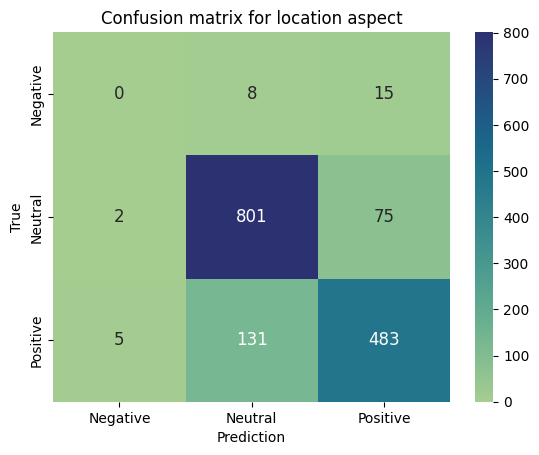

staff
Accuracy
 86.90789473684211 %

classification_report
               precision    recall  f1-score   support

    Negative       0.59      0.38      0.46        61
     Neutral       0.85      0.90      0.88       636
    Positive       0.90      0.88      0.89       823

    accuracy                           0.87      1520
   macro avg       0.78      0.72      0.74      1520
weighted avg       0.87      0.87      0.87      1520



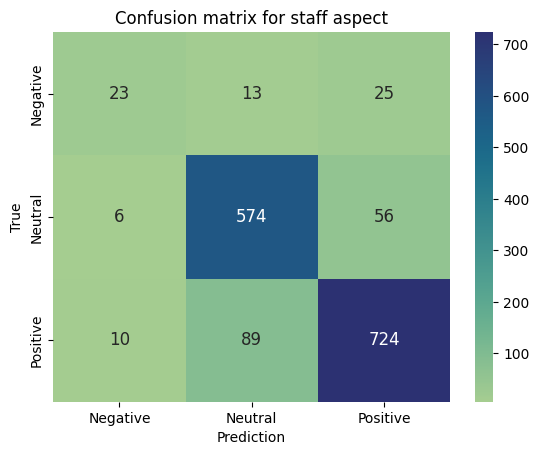

room
Accuracy
 76.18421052631578 %

classification_report
               precision    recall  f1-score   support

    Negative       0.43      0.43      0.43        92
     Neutral       0.80      0.80      0.80       762
    Positive       0.76      0.76      0.76       666

    accuracy                           0.76      1520
   macro avg       0.66      0.67      0.66      1520
weighted avg       0.76      0.76      0.76      1520



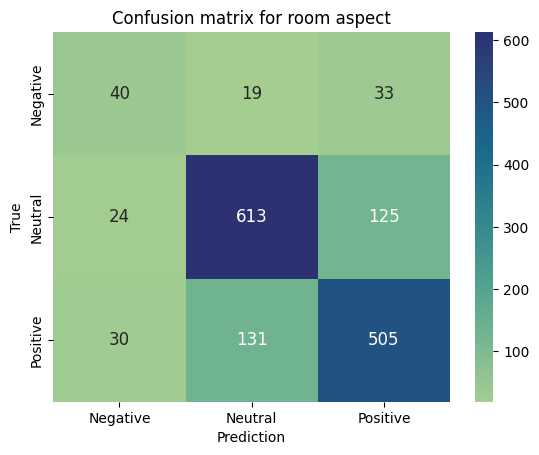

facility
Accuracy
 73.75 %

classification_report
               precision    recall  f1-score   support

    Negative       0.51      0.61      0.56       171
     Neutral       0.79      0.87      0.82       935
    Positive       0.72      0.50      0.59       414

    accuracy                           0.74      1520
   macro avg       0.67      0.66      0.66      1520
weighted avg       0.74      0.74      0.73      1520



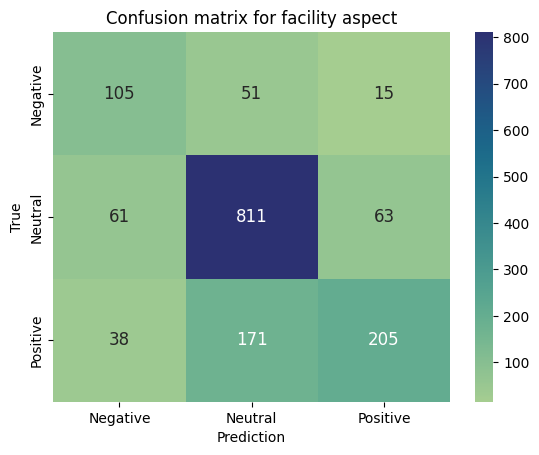

quality
Accuracy
 82.56578947368422 %

classification_report
               precision    recall  f1-score   support

    Negative       0.29      0.14      0.19        35
     Neutral       0.84      0.98      0.90      1258
    Positive       0.59      0.06      0.10       227

    accuracy                           0.83      1520
   macro avg       0.57      0.39      0.40      1520
weighted avg       0.79      0.83      0.77      1520



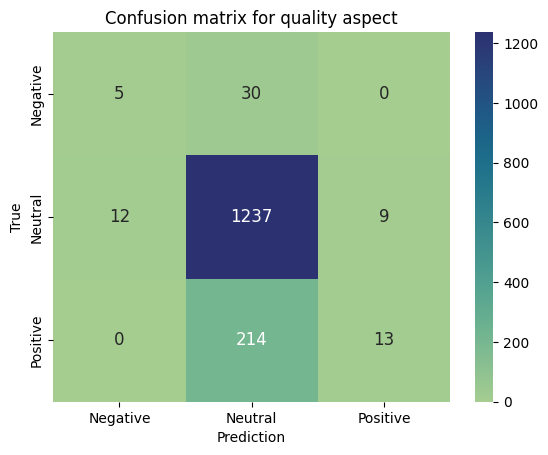

value
Accuracy
 82.56578947368422 %

classification_report
               precision    recall  f1-score   support

    Negative       0.38      0.29      0.32        42
     Neutral       0.85      0.95      0.90      1180
    Positive       0.70      0.42      0.52       298

    accuracy                           0.83      1520
   macro avg       0.64      0.55      0.58      1520
weighted avg       0.81      0.83      0.81      1520



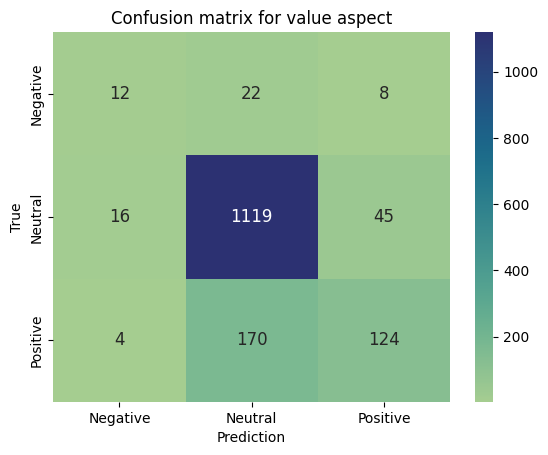

Saving model surrounding
Saving model service
Saving model meal
Saving model location
Saving model staff
Saving model room
Saving model facility
Saving model quality
Saving model value
Save model Finished
CPU times: total: 34.4 s
Wall time: 38min 33s


In [2]:
%%time
# Dengan SMOTE dan cost sensitive learning
import pandas as pd
df = pd.read_csv('notebooks/data/data_english.csv')
df = df.dropna().drop_duplicates()
sentiments = df.iloc[:,4:13]
texts = df['review.message']
clf.create_models(texts,sentiments=sentiments)

surrounding
Accuracy
 67.17105263157895 %

classification_report
               precision    recall  f1-score   support

    Negative       0.68      0.24      0.36       133
     Neutral       0.50      0.29      0.37       415
    Positive       0.70      0.89      0.79       972

    accuracy                           0.67      1520
   macro avg       0.63      0.48      0.50      1520
weighted avg       0.65      0.67      0.64      1520



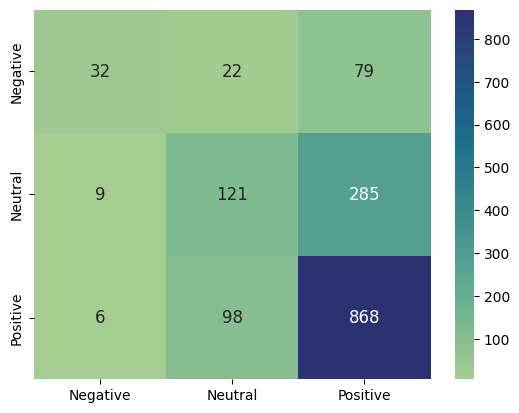

service
Accuracy
 76.64473684210526 %

classification_report
               precision    recall  f1-score   support

    Negative       0.62      0.28      0.39        93
     Neutral       0.74      0.74      0.74       579
    Positive       0.79      0.84      0.81       848

    accuracy                           0.77      1520
   macro avg       0.72      0.62      0.65      1520
weighted avg       0.76      0.77      0.76      1520



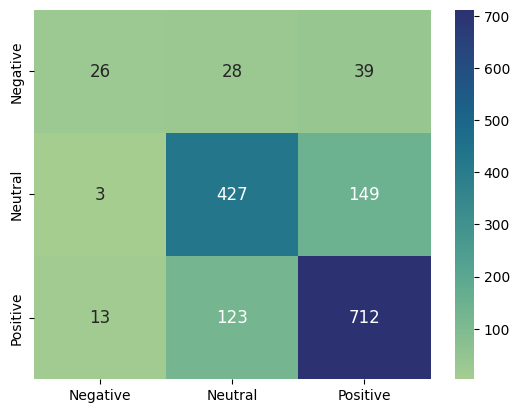

meal
Accuracy
 78.55263157894737 %

classification_report
               precision    recall  f1-score   support

    Negative       0.45      0.07      0.12        70
     Neutral       0.80      0.86      0.83       794
    Positive       0.77      0.77      0.77       656

    accuracy                           0.79      1520
   macro avg       0.68      0.57      0.57      1520
weighted avg       0.77      0.79      0.77      1520



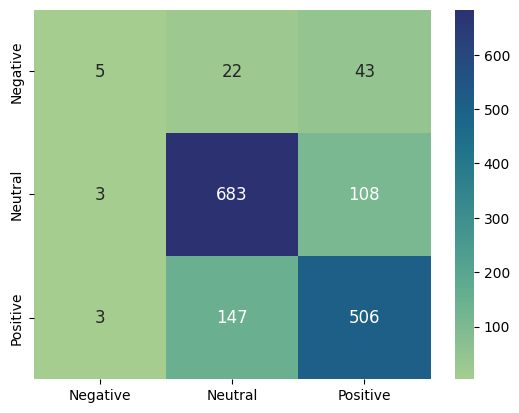

location
Accuracy
 84.34210526315789 %

classification_report
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        23
     Neutral       0.84      0.92      0.88       878
    Positive       0.85      0.77      0.81       619

    accuracy                           0.84      1520
   macro avg       0.56      0.56      0.56      1520
weighted avg       0.83      0.84      0.84      1520



c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

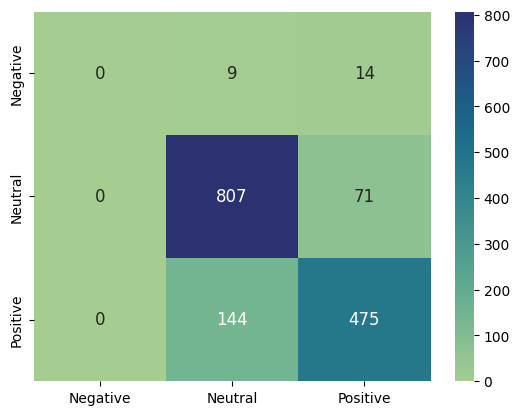

staff
Accuracy
 87.03947368421052 %

classification_report
               precision    recall  f1-score   support

    Negative       0.75      0.20      0.31        61
     Neutral       0.86      0.89      0.88       636
    Positive       0.88      0.90      0.89       823

    accuracy                           0.87      1520
   macro avg       0.83      0.66      0.69      1520
weighted avg       0.87      0.87      0.86      1520



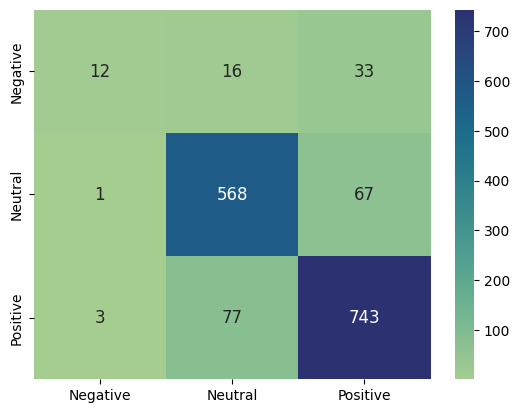

room
Accuracy
 75.6578947368421 %

classification_report
               precision    recall  f1-score   support

    Negative       0.59      0.21      0.31        92
     Neutral       0.77      0.83      0.80       762
    Positive       0.75      0.75      0.75       666

    accuracy                           0.76      1520
   macro avg       0.70      0.60      0.62      1520
weighted avg       0.75      0.76      0.75      1520



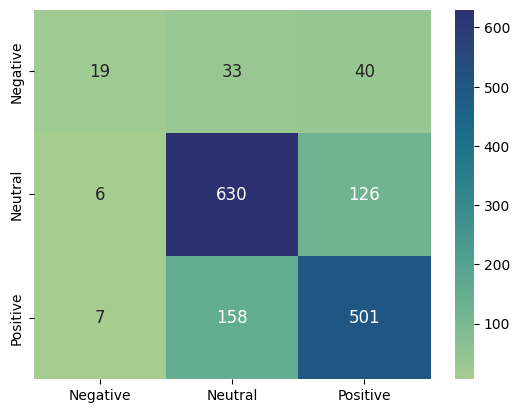

facility
Accuracy
 72.96052631578948 %

classification_report
               precision    recall  f1-score   support

    Negative       0.66      0.36      0.46       171
     Neutral       0.74      0.91      0.82       935
    Positive       0.72      0.47      0.57       414

    accuracy                           0.73      1520
   macro avg       0.70      0.58      0.62      1520
weighted avg       0.72      0.73      0.71      1520



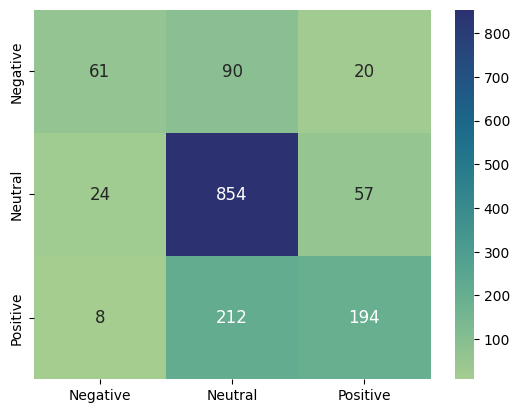

quality
Accuracy
 82.89473684210526 %

classification_report
               precision    recall  f1-score   support

    Negative       1.00      0.03      0.06        35
     Neutral       0.83      1.00      0.91      1258
    Positive       0.56      0.02      0.04       227

    accuracy                           0.83      1520
   macro avg       0.80      0.35      0.33      1520
weighted avg       0.79      0.83      0.76      1520



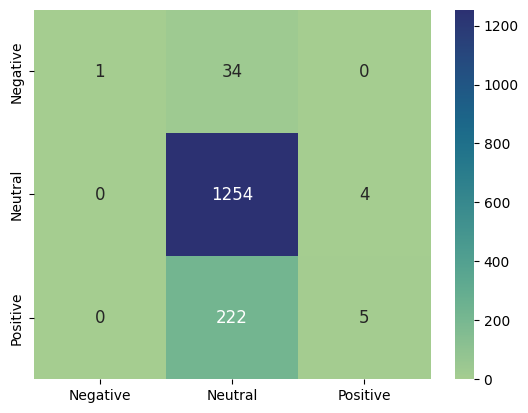

value
Accuracy
 82.63157894736842 %

classification_report
               precision    recall  f1-score   support

    Negative       0.62      0.12      0.20        42
     Neutral       0.84      0.97      0.90      1180
    Positive       0.72      0.37      0.49       298

    accuracy                           0.83      1520
   macro avg       0.73      0.49      0.53      1520
weighted avg       0.81      0.83      0.80      1520



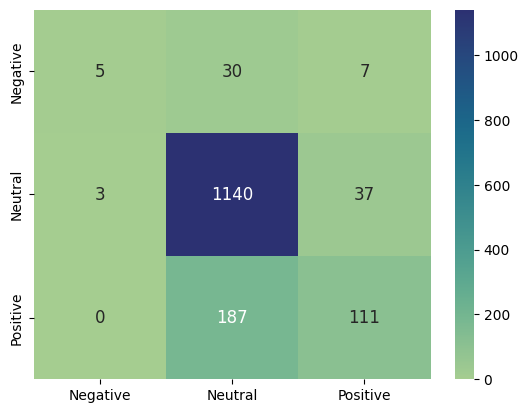

CPU times: total: 40.8 s
Wall time: 32min 37s


In [2]:
%%time
# tanpa SMOTE dan cost sensitive learning
import pandas as pd
df = pd.read_csv('notebooks/data/data_english.csv')
df = df.dropna().drop_duplicates()
sentiments = df.iloc[:,4:13]
texts = df['review.message']

clf.train_test(texts,sentiments)



surrounding
Accuracy
 65.0 %

classification_report
               precision    recall  f1-score   support

    Negative       0.47      0.48      0.47       133
     Neutral       0.47      0.46      0.46       415
    Positive       0.75      0.76      0.75       972

    accuracy                           0.65      1520
   macro avg       0.56      0.56      0.56      1520
weighted avg       0.65      0.65      0.65      1520



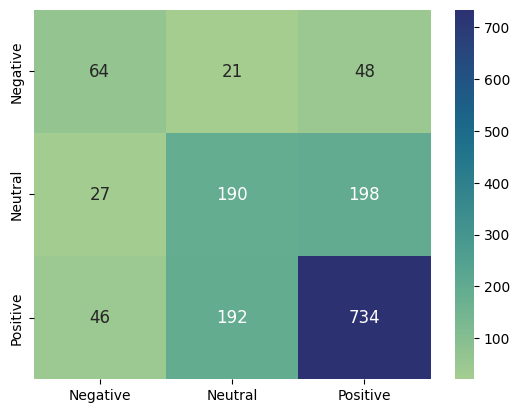

service
Accuracy
 75.0 %

classification_report
               precision    recall  f1-score   support

    Negative       0.43      0.45      0.44        93
     Neutral       0.71      0.75      0.73       579
    Positive       0.81      0.78      0.80       848

    accuracy                           0.75      1520
   macro avg       0.65      0.66      0.66      1520
weighted avg       0.75      0.75      0.75      1520



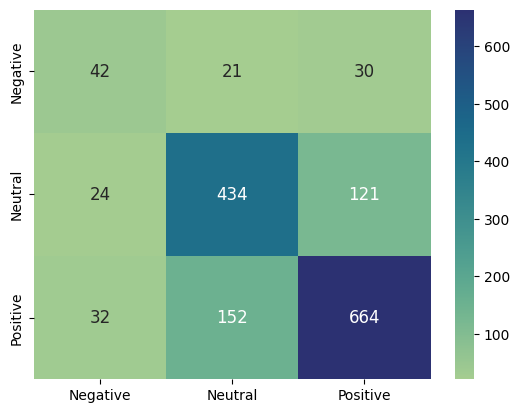

meal
Accuracy
 79.14473684210527 %

classification_report
               precision    recall  f1-score   support

    Negative       0.28      0.23      0.25        70
     Neutral       0.83      0.85      0.84       794
    Positive       0.79      0.78      0.79       656

    accuracy                           0.79      1520
   macro avg       0.63      0.62      0.63      1520
weighted avg       0.79      0.79      0.79      1520



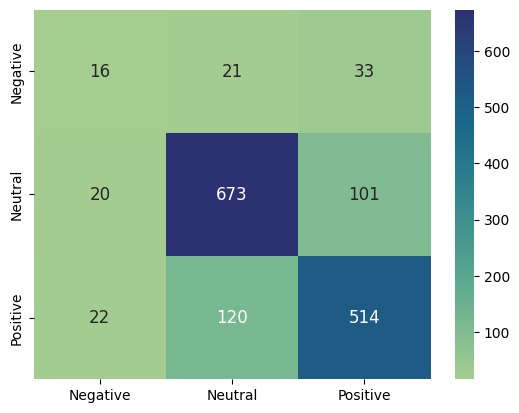

location
Accuracy
 84.40789473684211 %

classification_report
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        23
     Neutral       0.85      0.91      0.88       878
    Positive       0.84      0.78      0.81       619

    accuracy                           0.84      1520
   macro avg       0.56      0.56      0.56      1520
weighted avg       0.83      0.84      0.84      1520



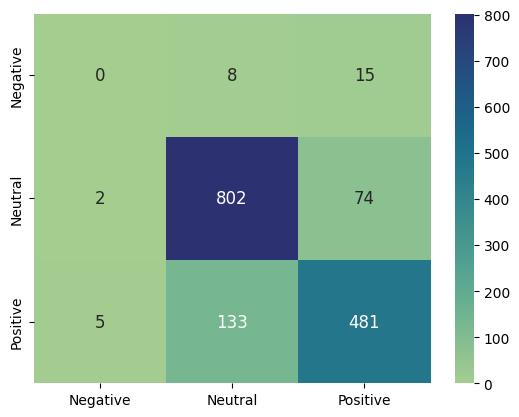

staff
Accuracy
 86.38157894736842 %

classification_report
               precision    recall  f1-score   support

    Negative       0.59      0.36      0.45        61
     Neutral       0.85      0.89      0.87       636
    Positive       0.89      0.88      0.89       823

    accuracy                           0.86      1520
   macro avg       0.78      0.71      0.73      1520
weighted avg       0.86      0.86      0.86      1520



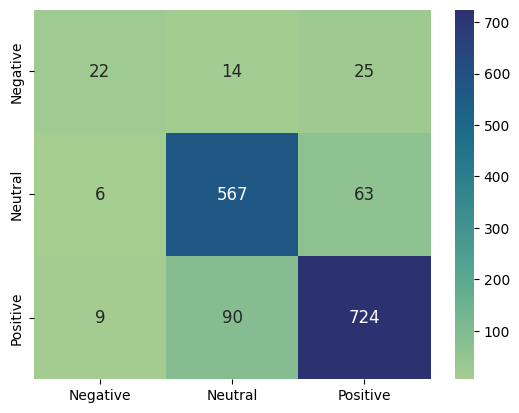

room
Accuracy
 76.18421052631578 %

classification_report
               precision    recall  f1-score   support

    Negative       0.43      0.43      0.43        92
     Neutral       0.80      0.80      0.80       762
    Positive       0.76      0.76      0.76       666

    accuracy                           0.76      1520
   macro avg       0.66      0.67      0.66      1520
weighted avg       0.76      0.76      0.76      1520



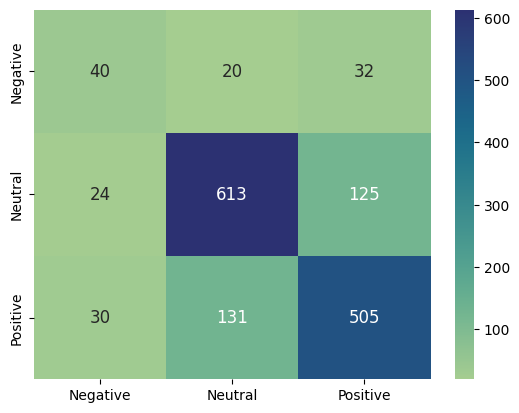

facility
Accuracy
 73.94736842105263 %

classification_report
               precision    recall  f1-score   support

    Negative       0.51      0.61      0.56       171
     Neutral       0.78      0.87      0.83       935
    Positive       0.74      0.49      0.59       414

    accuracy                           0.74      1520
   macro avg       0.68      0.66      0.66      1520
weighted avg       0.74      0.74      0.73      1520



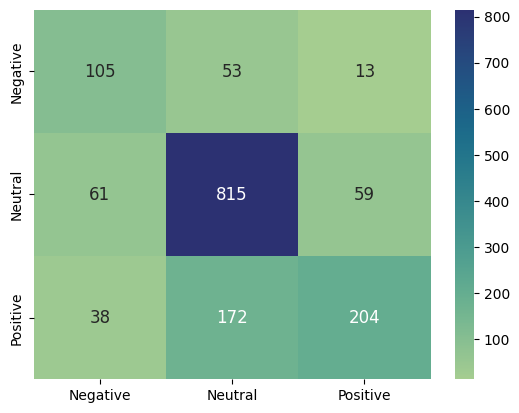

quality
Accuracy
 82.43421052631578 %

classification_report
               precision    recall  f1-score   support

    Negative       0.29      0.14      0.19        35
     Neutral       0.83      0.98      0.90      1258
    Positive       0.55      0.05      0.10       227

    accuracy                           0.82      1520
   macro avg       0.56      0.39      0.40      1520
weighted avg       0.78      0.82      0.77      1520



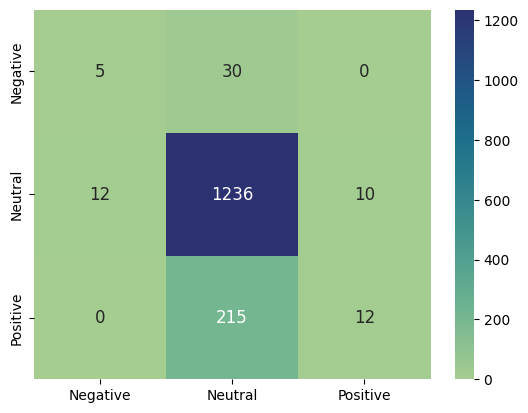

value
Accuracy
 82.56578947368422 %

classification_report
               precision    recall  f1-score   support

    Negative       0.38      0.29      0.32        42
     Neutral       0.86      0.95      0.90      1180
    Positive       0.69      0.42      0.52       298

    accuracy                           0.83      1520
   macro avg       0.64      0.55      0.58      1520
weighted avg       0.81      0.83      0.81      1520



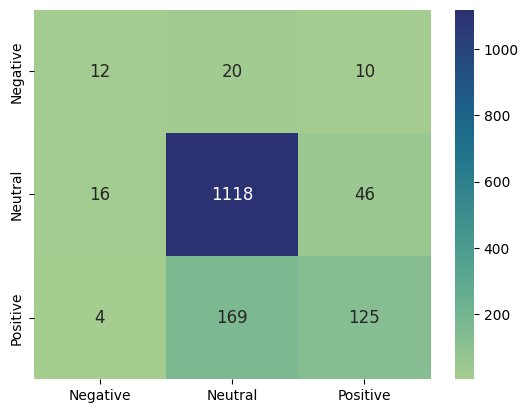

CPU times: total: 41.2 s
Wall time: 36min 40s


In [2]:
%%time
%%time
# Dengan cost sensitive learning saja
import pandas as pd
df = pd.read_csv('notebooks/data/data_english.csv')
df = df.dropna().drop_duplicates()
sentiments = df.iloc[:,4:13]
texts = df['review.message']

clf.train_test(texts,sentiments)


In [3]:
import pandas as pd
def label_text_based_on_aspect_keywords(text, aspect_keywords):
    # Convert text to lowercase for case-insensitive matching
    lower_text = text.lower()

    # Check for the presence of aspect keywords in the text
    aspect_sentiment = {}
    aspect_value = {}
    for aspect, keywords in aspect_keywords.items():
        aspect_sentiment[f'{aspect}'] = 0
        for keyword in keywords:
            if keyword.lower() in lower_text:
                aspect_sentiment[f'{aspect}'] += 1
            else:
                pass
        if aspect.split('_')[1] == 'negative':
             aspect_name = aspect.split('_')[0]
             aspect_value[f'{aspect_name}'] = aspect_sentiment[f'{aspect_name}_positive'] - aspect_sentiment[f'{aspect_name}_negative']
        
    return aspect_value

df = pd.read_excel('notebooks/hotel-aspect-keywords.xlsx',sheet_name='english_positive')
aspect_keywords = df.to_dict(orient='list')
aspect_keywords = {key: [value for value in values if pd.notna(value)] for key, values in aspect_keywords.items()}
# Example text
text_example = "It's was amazing place with service, serve dine, and others. I heard from my friend when I asked went honey moon on Jogja.. It's a beautiful place near Malioboro, Tugu Jogja, Kraton and etc. And I hear foods served in that place are good. It's also centrally located and Delicious cuisine. Picturesque Environment Serene Surroundings "

# Label the text for each aspect
label = label_text_based_on_aspect_keywords(text_example, aspect_keywords)
#print(f"{aspect} Label: {label}")
label

{'value': 0,
 'location': 2,
 'service': 0,
 'meal': 1,
 'facility': 0,
 'room': 0,
 'quality': 0,
 'staff': 0,
 'surrounding': 2}